<a href="https://colab.research.google.com/github/rohitnikam1/Sales_Analysis/blob/master/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing relevant libraries

In [65]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from IPython.display import display, HTML, display_html
import os
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn
seaborn.set()

# Set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Merging 12 files into one file

In [8]:
path = '/content/drive/MyDrive/Colab_Notebooks/Sales_Data/data'

In [9]:
list_df = []

for file in os.listdir(path):
  if file.endswith('csv'):
    Df = pd.read_csv(f'{path}/{file}', parse_dates=['Order Date'])
    list_df.append(Df)

df = pd.concat(list_df)
display(df.shape)
display(df.head())

(186850, 6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


# **Question 1: What was the best month for sales? How much was earned that month?**

In [10]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


None

It can be seen that the `Order Date` column is of type `object` and not datetime type. We therefore intend to first convert the column into the datetime type and afterwards extract month from there.

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M")

ValueError: ignored

As seen, trying to parse the column into the datetime type returns an error. This could be due to missing values present in the dataframe. Let's check.

In [12]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

There are 545 rows with missing values, which is probably the reason for error in the datetime conversion.

In [13]:
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
199,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


As can be seen, rows with NaN values have all fields as NaN. We will drop these rows.

In [14]:
df = df.dropna(how='all')

It's now time to retry the parsing of `Order Date` column as datetime type.

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M")

ValueError: ignored

We still get the same error. Note that the purpose of parsing the `Order Date` column into the datetime type is to extract month from the column. In order to zero in on what might be the core reason of the above error, we look for alternative ways to separate the month from the `Order Date` column. Simple way is to extract month string (initial 2 characters) from the column. 

In [16]:
df['Month'] = df['Order Date'].str[:2]

In [18]:
display(df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",07
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",07


The month column here is a string type. We now attempt to convert it to integer type.

In [19]:
df['Month'] = df['Month'].astype('int32')

ValueError: ignored

The error recieved above gives more detailed picture of the reason behind the error on line 94. There are some entries in the `Month` column that are `Or` which is not numeric and therefore causing trouble in conversion to integer type. Let's see it clearly.

In [21]:
display(df[df['Month'] == 'Or'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


As can be seen, there are 355 rows with this issue. We remove these entries by doing the following assignment.

In [22]:
df = df[df['Month'] != 'Or']

Let's now try again the same assignment in line 94, i.e., parsing the `Order Date` as datetime type. While we already have `Month` column extracted, we try its conversion to integer datatype again.

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M")

In [24]:
df['Month'] = df['Month'].astype('int64')

In [25]:
df.rename(columns={'Month':'Order Month'}, inplace=True)

We now revisit the question 1. In order to evaluate the sales value, we need to multiply `Quantity Ordered` by `Price Each`. Let's create the `Sales` column.

In [26]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

TypeError: ignored

It looks like both columns are string types. Let's convert them into numeric types. Pandas `to_numeric` function can serve that purpose.

In [27]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [28]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [29]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [30]:
df.groupby('Order Month').sum()['Sales'].to_frame('Monthly Sales')

,Monthly Sales
Order Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


As seen, December was the best sales month. We can verify it as follows

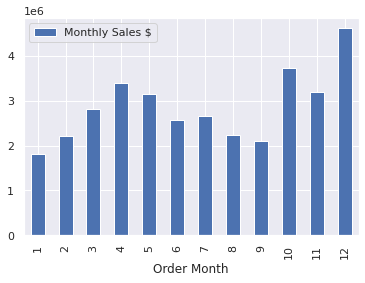

In [31]:
ser = df.groupby('Order Month').sum()['Sales'].to_frame('Monthly Sales $')
ser.plot(kind='bar'); 

# **Question 2: Which US city had the highest number of sales?**

In [32]:
display(df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95


To answer this question, we first need to extract city string from the `Purchase Address` field. This can easily be done using `apply` function.

In [33]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
display(df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle


In [34]:
df.groupby('City').sum()['Sales']

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Sales, dtype: float64

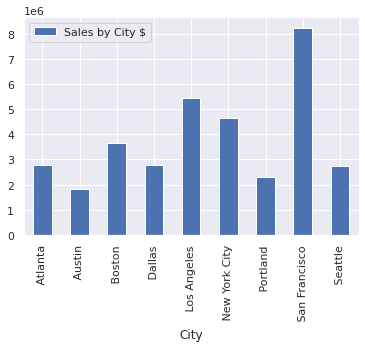

In [35]:
ser2 = df.groupby('City').sum()['Sales'].to_frame('Sales by City $')
ser2.plot(kind='bar');

However, it is possible that the two cities have the same name but are from different states. They could be counted twice in the plot, which is misleading. To circumvent this issue, we assign state name with the city name. For that, we separate the state column. We first separate `Street`, `City` and `State Pin` fields (based on ', ' delimiter) and later we separate `State` and `Pin` fields (based on ' ' delimiter)

In [36]:
df[['Street', 'City', 'State Pin']] = df['Purchase Address'].str.split(',',2, expand=True )
#df.drop(['Purchase Address'], axis=1, inplace=True)
df[['State', 'Pin']] = df['State Pin'].str.strip().str.split(" ", 1, expand=True)
df.drop(['State Pin'], axis=1, inplace=True)
display(df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Street,State,Pin
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,389 South St,GA,30301
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,590 4th St,WA,98101
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,861 Hill St,GA,30301
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,190 Ridge St,GA,30301
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,824 Forest St,WA,98101


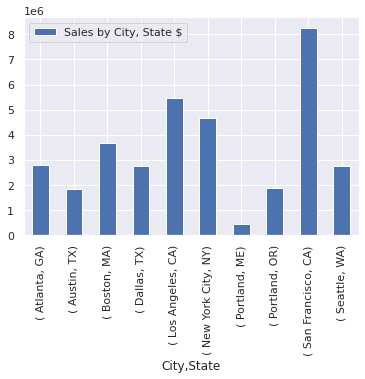

In [37]:
ser3 = df.groupby(['City', 'State']).sum()['Sales'].to_frame('Sales by City, State $')
ser3.plot(kind='bar');

As we can see, Portland from OR and ME are different. So grouping by state helped.

# **Question 3: At what time should we display advertisements to maximize the likelihood of customers buying the product?**

In [38]:
df.set_index('Order Date', inplace=True)

In [39]:
display(df.head())

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Month,Sales,City,Street,State,Pin
Order Date,,,,,,,,,,,
2019-07-26 16:51:00,222910,Apple Airpods Headphones,1,150.00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,389 South St,GA,30301
2019-07-05 08:55:00,222911,Flatscreen TV,1,300.00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,590 4th St,WA,98101
2019-07-29 12:41:00,222912,AA Batteries (4-pack),1,3.84,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,861 Hill St,GA,30301
2019-07-28 10:15:00,222913,AA Batteries (4-pack),1,3.84,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,190 Ridge St,GA,30301
2019-07-31 02:13:00,222914,AAA Batteries (4-pack),5,2.99,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,824 Forest St,WA,98101


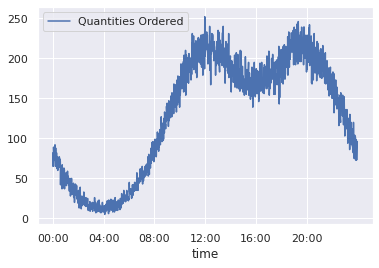

In [40]:
dff = df.groupby(df.index.time).count()['Quantity Ordered'].to_frame('Quantities Ordered')
hourly_ticks = 4*60*60*np.array(range(6))
dff.plot(xticks=hourly_ticks);

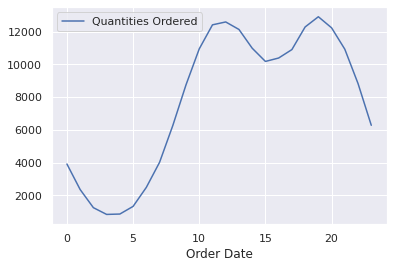

In [41]:
hourly = df.groupby(df.index.hour).count()['Quantity Ordered'].to_frame('Quantities Ordered')
hourly.plot();

The plots above show that around 11:00 and 19:00 are good times to advertise the products.

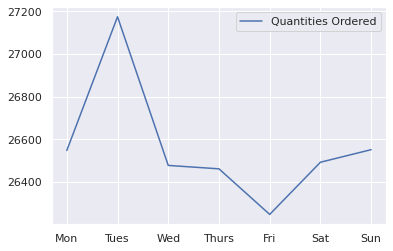

In [42]:
dayofWeek = df.groupby(df.index.dayofweek).count()['Quantity Ordered'].to_frame('Quantities Ordered')
dayofWeek.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
dayofWeek.plot();

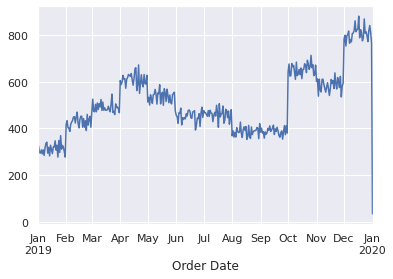

In [43]:
daily = df.resample('D').count()
daily['Quantity Ordered'].plot();

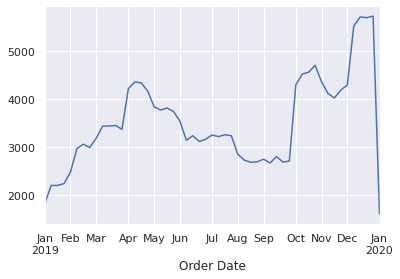

In [44]:
weekly = df.resample('W').count()
weekly['Quantity Ordered'].plot();

# **Question 4: Which products are most often sold together?**

In [ ]:
display(df.head())

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Month,Sales,City,Street,State,Pin
Order Date,,,,,,,,,,,
2019-07-26 16:51:00,222910,Apple Airpods Headphones,1,150.00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,389 South St,GA,30301
2019-07-05 08:55:00,222911,Flatscreen TV,1,300.00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,590 4th St,WA,98101
2019-07-29 12:41:00,222912,AA Batteries (4-pack),1,3.84,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,861 Hill St,GA,30301
2019-07-28 10:15:00,222913,AA Batteries (4-pack),1,3.84,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,190 Ridge St,GA,30301
2019-07-31 02:13:00,222914,AAA Batteries (4-pack),5,2.99,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,824 Forest St,WA,98101


We first start with locating all the rows with duplicated Order IDs.

In [55]:
dupl_orders = df[df['Order ID'].duplicated(keep = False)] # Keep = False keeps all occurences of duplicates
display(dupl_orders.head(15))

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Month,Sales,City,Street,State,Pin
Order Date,,,,,,,,,,,
2019-07-07 10:21:00,223028,Vareebadd Phone,1,400.00,"969 10th St, San Francisco, CA 94016",7,400.00,San Francisco,969 10th St,CA,94016
2019-07-07 10:21:00,223028,USB-C Charging Cable,2,11.95,"969 10th St, San Francisco, CA 94016",7,23.90,San Francisco,969 10th St,CA,94016
2019-07-07 10:21:00,223028,Wired Headphones,1,11.99,"969 10th St, San Francisco, CA 94016",7,11.99,San Francisco,969 10th St,CA,94016
2019-07-21 17:19:00,223048,Vareebadd Phone,1,400.00,"168 8th St, Portland, OR 97035",7,400.00,Portland,168 8th St,OR,97035
2019-07-21 17:19:00,223048,USB-C Charging Cable,2,11.95,"168 8th St, Portland, OR 97035",7,23.90,Portland,168 8th St,OR,97035
2019-07-03 13:42:00,223095,Apple Airpods Headphones,1,150.00,"876 Cedar St, Los Angeles, CA 90001",7,150.00,Los Angeles,876 Cedar St,CA,90001
2019-07-03 13:42:00,223095,AA Batteries (4-pack),1,3.84,"876 Cedar St, Los Angeles, CA 90001",7,3.84,Los Angeles,876 Cedar St,CA,90001
2019-07-14 14:30:00,223106,Wired Headphones,1,11.99,"630 2nd St, San Francisco, CA 94016",7,11.99,San Francisco,630 2nd St,CA,94016
2019-07-14 14:30:00,223106,Vareebadd Phone,1,400.00,"630 2nd St, San Francisco, CA 94016",7,400.00,San Francisco,630 2nd St,CA,94016


We now need to group together all the entries (Product) with same Order IDs.

In [56]:
dupl_orders['Grouped'] = dupl_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
display(dupl_orders.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Month,Sales,City,Street,State,Pin,Grouped
Order Date,,,,,,,,,,,,
2019-07-07 10:21:00,223028,Vareebadd Phone,1,400.00,"969 10th St, San Francisco, CA 94016",7,400.00,San Francisco,969 10th St,CA,94016,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
2019-07-07 10:21:00,223028,USB-C Charging Cable,2,11.95,"969 10th St, San Francisco, CA 94016",7,23.90,San Francisco,969 10th St,CA,94016,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
2019-07-07 10:21:00,223028,Wired Headphones,1,11.99,"969 10th St, San Francisco, CA 94016",7,11.99,San Francisco,969 10th St,CA,94016,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
2019-07-21 17:19:00,223048,Vareebadd Phone,1,400.00,"168 8th St, Portland, OR 97035",7,400.00,Portland,168 8th St,OR,97035,"Vareebadd Phone,USB-C Charging Cable"
2019-07-21 17:19:00,223048,USB-C Charging Cable,2,11.95,"168 8th St, Portland, OR 97035",7,23.90,Portland,168 8th St,OR,97035,"Vareebadd Phone,USB-C Charging Cable"
2019-07-03 13:42:00,223095,Apple Airpods Headphones,1,150.00,"876 Cedar St, Los Angeles, CA 90001",7,150.00,Los Angeles,876 Cedar St,CA,90001,"Apple Airpods Headphones,AA Batteries (4-pack)"
2019-07-03 13:42:00,223095,AA Batteries (4-pack),1,3.84,"876 Cedar St, Los Angeles, CA 90001",7,3.84,Los Angeles,876 Cedar St,CA,90001,"Apple Airpods Headphones,AA Batteries (4-pack)"
2019-07-14 14:30:00,223106,Wired Headphones,1,11.99,"630 2nd St, San Francisco, CA 94016",7,11.99,San Francisco,630 2nd St,CA,94016,"Wired Headphones,Vareebadd Phone"
2019-07-14 14:30:00,223106,Vareebadd Phone,1,400.00,"630 2nd St, San Francisco, CA 94016",7,400.00,San Francisco,630 2nd St,CA,94016,"Wired Headphones,Vareebadd Phone"


In [57]:
# Removing duplicate entries with the same Order ID
dupl_orders = dupl_orders[['Order ID', 'Grouped']].drop_duplicates()
display(dupl_orders.head(10))

,Order ID,Grouped
Order Date,,
2019-07-07 10:21:00,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
2019-07-21 17:19:00,223048,"Vareebadd Phone,USB-C Charging Cable"
2019-07-03 13:42:00,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
2019-07-14 14:30:00,223106,"Wired Headphones,Vareebadd Phone"
2019-07-11 23:25:00,223117,"Google Phone,USB-C Charging Cable"
2019-07-28 20:40:00,223133,"AA Batteries (4-pack),AAA Batteries (4-pack)"
2019-07-22 09:58:00,223140,"AA Batteries (4-pack),Flatscreen TV"
2019-07-15 21:51:00,223144,"Google Phone,USB-C Charging Cable"
2019-07-09 17:05:00,223210,"AA Batteries (4-pack),27in FHD Monitor"


We now count the number of occurences of each Grouped product pairs.

In [64]:
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in dupl_orders['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## **Alternate Solution**

In [45]:
display(df.head())

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Month,Sales,City,Street,State,Pin
Order Date,,,,,,,,,,,
2019-07-26 16:51:00,222910,Apple Airpods Headphones,1,150.00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,389 South St,GA,30301
2019-07-05 08:55:00,222911,Flatscreen TV,1,300.00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,590 4th St,WA,98101
2019-07-29 12:41:00,222912,AA Batteries (4-pack),1,3.84,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,861 Hill St,GA,30301
2019-07-28 10:15:00,222913,AA Batteries (4-pack),1,3.84,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,190 Ridge St,GA,30301
2019-07-31 02:13:00,222914,AAA Batteries (4-pack),5,2.99,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,824 Forest St,WA,98101


In [46]:
fr = df.groupby(['Order ID']).count()['Product']
fr = pd.DataFrame(fr[fr>1])
len(fr.index)

7136

In [47]:
from itertools import combinations as cmb

In [48]:
total_products = list(set(df['Product']))
totProductCombs = list(cmb(total_products, 2))
totProductCombs = [frozenset(x) for x in totProductCombs]

In [49]:
recorder = {}
for order in fr.index:
  #print(set(df[df['Order ID'] == order]['Product']))
  combination = frozenset(df[df['Order ID'] == order]['Product'])
  if combination in totProductCombs:
    recorder[combination] = recorder.get(combination, 0) + 1

recorder

{frozenset({'USB-C Charging Cable', 'Wired Headphones'}): 82,
 frozenset({'AA Batteries (4-pack)', 'Apple Airpods Headphones'}): 70,
 frozenset({'Vareebadd Phone', 'Wired Headphones'}): 110,
 frozenset({'Google Phone', 'USB-C Charging Cable'}): 869,
 frozenset({'Bose SoundSport Headphones', 'Google Phone'}): 169,
 frozenset({'Apple Airpods Headphones', 'iPhone'}): 299,
 frozenset({'Apple Airpods Headphones', 'Google Phone'}): 17,
 frozenset({'Apple Airpods Headphones', 'USB-C Charging Cable'}): 60,
 frozenset({'Lightning Charging Cable', 'Wired Headphones'}): 66,
 frozenset({'Lightning Charging Cable', 'iPhone'}): 895,
 frozenset({'27in FHD Monitor', 'Bose SoundSport Headphones'}): 25,
 frozenset({'Wired Headphones', 'iPhone'}): 374,
 frozenset({'AA Batteries (4-pack)', 'AAA Batteries (4-pack)'}): 87,
 frozenset({'34in Ultrawide Monitor', 'Lightning Charging Cable'}): 32,
 frozenset({'Bose SoundSport Headphones', 'Lightning Charging Cable'}): 71,
 frozenset({'Google Phone', 'Wired Head

Function that sorts dictionary by values

In [50]:
def sortDictReverse(x):
    keys = sorted(x, reverse = True, key = x.get)
    return {key: x[key] for key in keys}

In [51]:
sortDictReverse(recorder)

{frozenset({'Lightning Charging Cable', 'iPhone'}): 895,
 frozenset({'Google Phone', 'USB-C Charging Cable'}): 869,
 frozenset({'Wired Headphones', 'iPhone'}): 374,
 frozenset({'USB-C Charging Cable', 'Vareebadd Phone'}): 318,
 frozenset({'Google Phone', 'Wired Headphones'}): 311,
 frozenset({'Apple Airpods Headphones', 'iPhone'}): 299,
 frozenset({'Bose SoundSport Headphones', 'Google Phone'}): 169,
 frozenset({'Vareebadd Phone', 'Wired Headphones'}): 110,
 frozenset({'AA Batteries (4-pack)', 'Lightning Charging Cable'}): 103,
 frozenset({'Lightning Charging Cable', 'USB-C Charging Cable'}): 96,
 frozenset({'AAA Batteries (4-pack)', 'USB-C Charging Cable'}): 92,
 frozenset({'AA Batteries (4-pack)', 'AAA Batteries (4-pack)'}): 87,
 frozenset({'AAA Batteries (4-pack)', 'Wired Headphones'}): 86,
 frozenset({'USB-C Charging Cable', 'Wired Headphones'}): 82,
 frozenset({'AA Batteries (4-pack)', 'Wired Headphones'}): 80,
 frozenset({'AAA Batteries (4-pack)', 'Lightning Charging Cable'}): 79

# **Question 5: Which product was sold the most? Why do you think it was sold the most?**

In [52]:
display(df.head())

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Month,Sales,City,Street,State,Pin
Order Date,,,,,,,,,,,
2019-07-26 16:51:00,222910,Apple Airpods Headphones,1,150.00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,389 South St,GA,30301
2019-07-05 08:55:00,222911,Flatscreen TV,1,300.00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,590 4th St,WA,98101
2019-07-29 12:41:00,222912,AA Batteries (4-pack),1,3.84,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,861 Hill St,GA,30301
2019-07-28 10:15:00,222913,AA Batteries (4-pack),1,3.84,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,190 Ridge St,GA,30301
2019-07-31 02:13:00,222914,AAA Batteries (4-pack),5,2.99,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,824 Forest St,WA,98101


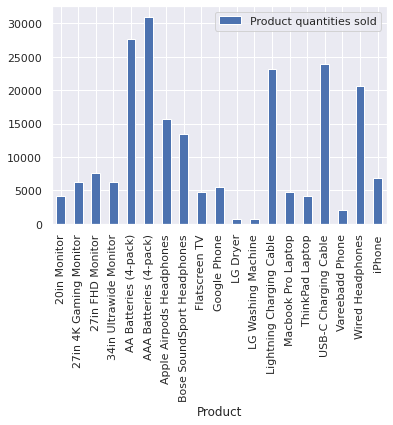

In [66]:
quantities_ordered = df.groupby('Product').sum()['Quantity Ordered'].to_frame('Product quantities sold')
quantities_ordered.plot(kind='bar');

AAA batteries were sold the most since they are cheap and regularly required for power consumption. Let's check item prices.

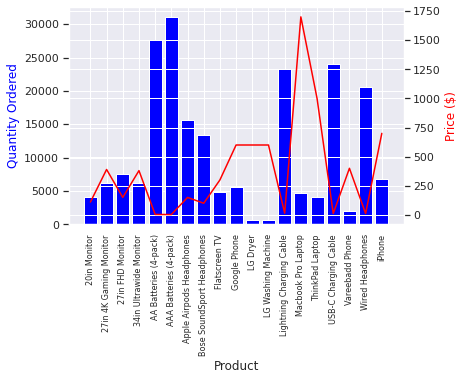

In [81]:
product_group = df.groupby('Product')
quantities_ordered = product_group.sum()['Quantity Ordered']
product_avg_prices = product_group.mean()['Price Each']

products = [product for product, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantities_ordered, color = 'blue')
ax2.plot(products, product_avg_prices, color = 'red')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = 'blue')
ax2.set_ylabel('Price ($)', color = 'red')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()

As can be seen, AAA batteries are one of the cheapest items, and therefore, as the plot shows are the highest in demand. The plot also leads us to think that the quantities ordered of a certain product are negatively correlated to its price. However, in such case, some new questions may arise, such as, how is it that Macbook Pro Laptop, while having the highest price has higher demand than LG Dryer? Perhaps because there are more students among buyers in the current data. But this hypothesis will need verification with the help of additional information about buyer's occupation, etc.